In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df_students = pd.read_csv('MLData/enhanced_student_habits_performance_dataset.csv')

# Display the first few rows of each dataset for a quick overview
print("Student Habits Dataset:")
display(df_students.head())
print("Total rows:", len(df_students))

Student Habits Dataset:


,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


Total rows: 80000


In [5]:
# Check for missing data
print("Missing values per column:\n")
print(df_students.isnull().sum())

# Check the percentage of missing data
print("\nPercentage of missing values per column:\n")
print((df_students.isnull().mean() * 100).round(2))

# Summary of complete vs incomplete rows
total_rows = len(df_students)
complete_rows = df_students.dropna().shape[0]
print(f"\nComplete rows: {complete_rows}/{total_rows} ({(complete_rows/total_rows)*100:.2f}%)")

Missing values per column:

student_id                       0
age                              0
gender                           0
major                            0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
previous_gpa                     0
semester                         0
stress_level                     0
dropout_risk                     0
social_activity                  0
screen_time                      0
study_environment                0
access_to_tutoring               0
family_income_range              0
parental_support_level           0
motivation_level                 0
exam_anxiety_score         

In [7]:
# Check for duplicate student_id values
duplicate_ids = df_students[df_students.duplicated(subset='student_id', keep=False)]

print(f"Number of duplicate student_id rows: {len(duplicate_ids)}")
display(duplicate_ids.head() if not duplicate_ids.empty else "No duplicates found.")

Number of duplicate student_id rows: 0


'No duplicates found.'

In [9]:
# Count unique values per column
unique_counts = df_students.nunique()

# Display the counts sorted descending
unique_counts.sort_values(ascending=False)

student_id                       80000
study_hours_per_day              13364
attendance_percentage              601
previous_gpa                       220
screen_time                        198
mental_health_rating               100
time_management_score               91
stress_level                        91
sleep_hours                         81
exam_score                          65
social_media_hours                  51
netflix_hours                       41
age                                 13
parental_support_level              10
motivation_level                    10
semester                             8
exercise_frequency                   8
social_activity                      6
exam_anxiety_score                   6
major                                6
parental_education_level             5
study_environment                    5
learning_style                       4
gender                               3
diet_quality                         3
family_income_range      

In [11]:
# List of categorical and boolean columns to inspect
columns_to_check = [
    'diet_quality',
    'parental_education_level',
    'internet_quality',
    'study_environment',
    'family_income_range',
    'learning_style',
    'gender',
    'part_time_job',
    'extracurricular_participation',
    'dropout_risk',
    'access_to_tutoring'
]

# Display unique values per column
for col in columns_to_check:
    print(f"Column: {col}")
    print(df_students[col].value_counts())
    print("-" * 40)

Column: diet_quality
diet_quality
Good    39935
Fair    26713
Poor    13352
Name: count, dtype: int64
----------------------------------------
Column: parental_education_level
parental_education_level
Some College    16115
High School     16106
Bachelor        15986
Master          15908
PhD             15885
Name: count, dtype: int64
----------------------------------------
Column: internet_quality
internet_quality
High      26749
Low       26714
Medium    26537
Name: count, dtype: int64
----------------------------------------
Column: study_environment
study_environment
Dorm                 16119
Cafe                 16038
Quiet Room           15991
Co-Learning Group    15949
Library              15903
Name: count, dtype: int64
----------------------------------------
Column: family_income_range
family_income_range
Low       26720
High      26653
Medium    26627
Name: count, dtype: int64
----------------------------------------
Column: learning_style
learning_style
Kinesthetic    201

In [13]:
# Make a copy of the original dataframe to preserve it
df_students_numeric = df_students.copy()

# Ordered categorical columns → mapped to numeric values based on logical ordering
# Diet quality: Poor < Fair < Good
df_students_numeric['diet_quality'] = df_students_numeric['diet_quality'].map({'Poor': 0, 'Fair': 1, 'Good': 2})

# Parental education level: High School < Some College < Bachelor < Master < PhD
df_students_numeric['parental_education_level'] = df_students_numeric['parental_education_level'].map({
    'High School': 0,
    'Some College': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
})

# Internet quality: Low < Medium < High
df_students_numeric['internet_quality'] = df_students_numeric['internet_quality'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Family income range: Low < Medium < High
df_students_numeric['family_income_range'] = df_students_numeric['family_income_range'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Gender
df_students_numeric['gender'] = df_students_numeric['gender'].map({'Male':0, 'Female':1, 'Other':2})

# Boolean columns → map Yes/No to 1/0
bool_cols = ['part_time_job', 'extracurricular_participation', 'dropout_risk', 'access_to_tutoring']
for col in bool_cols:
    df_students_numeric[col] = df_students_numeric[col].map({'No': 0, 'Yes': 1})

# Display the first few rows to confirm conversion
numeric_cols = df_students.select_dtypes(include=['int64', 'float64']).columns
print("Number of numeric columns:", len(numeric_cols))
df_students_numeric.head()

Number of numeric columns: 19


,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,0,Computer Science,7.645367,3.0,0.1,1,70.3,6.2,...,10.9,Co-Learning Group,1,2,9,7,8,Reading,3.0,100
1,100001,28,0,Arts,5.700000,0.5,0.4,0,88.4,7.2,...,8.3,Co-Learning Group,1,0,7,2,10,Reading,6.0,99
2,100002,17,0,Arts,2.400000,4.2,0.7,0,82.1,9.2,...,8.0,Library,1,2,3,9,6,Kinesthetic,7.6,98
3,100003,27,2,Psychology,3.400000,4.6,2.3,1,79.3,4.2,...,11.7,Co-Learning Group,1,0,5,3,10,Reading,3.2,100
4,100004,25,1,Business,4.700000,0.8,2.7,1,62.9,6.5,...,9.4,Quiet Room,1,1,9,1,10,Reading,7.1,98


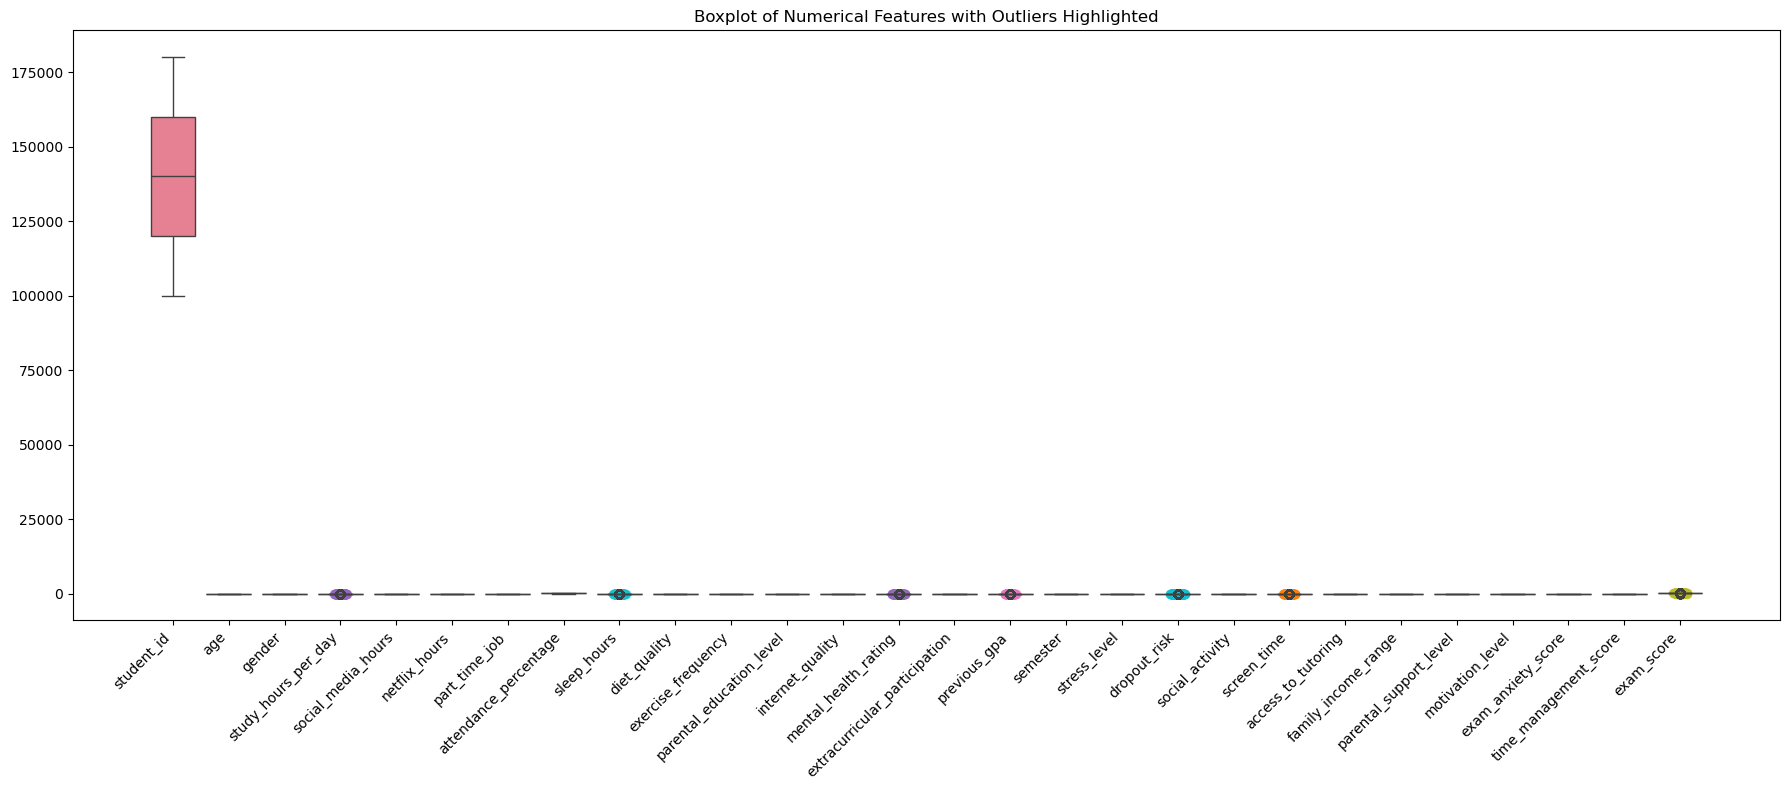

Number of outliers per numeric feature:
student_id                          0
age                                 0
gender                              0
study_hours_per_day               346
social_media_hours                  0
netflix_hours                       0
part_time_job                       0
attendance_percentage               0
sleep_hours                       284
diet_quality                        0
exercise_frequency                  0
parental_education_level            0
internet_quality                    0
mental_health_rating              345
extracurricular_participation       0
previous_gpa                      201
semester                            0
stress_level                        0
dropout_risk                     1582
social_activity                     0
screen_time                       356
access_to_tutoring                  0
family_income_range                 0
parental_support_level              0
motivation_level                    0
exam_anxie

In [15]:
# Select numeric columns
numeric_df = df_students_numeric.select_dtypes(include=['int64', 'float64'])

# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Visualise the outliers
plt.figure(figsize=(18, 8))
sns.boxplot(data=numeric_df, showfliers=True)

# Overlay outliers manually as red points
for i, col in enumerate(numeric_df.columns):
    y_outliers = numeric_df[col][outlier_mask[col]]
    x_outliers = np.random.normal(i, 0.04, size=len(y_outliers))  # jitter for visibility
    plt.scatter(x_outliers, y_outliers, alpha=0.6)

plt.xticks(ticks=range(len(numeric_df.columns)), labels=numeric_df.columns, rotation=45, ha='right')
plt.title("Boxplot of Numerical Features with Outliers Highlighted")
plt.tight_layout()
plt.show()

# Show number of outliers
outliers = outlier_mask.sum()
print("Number of outliers per numeric feature:")
print(outliers)

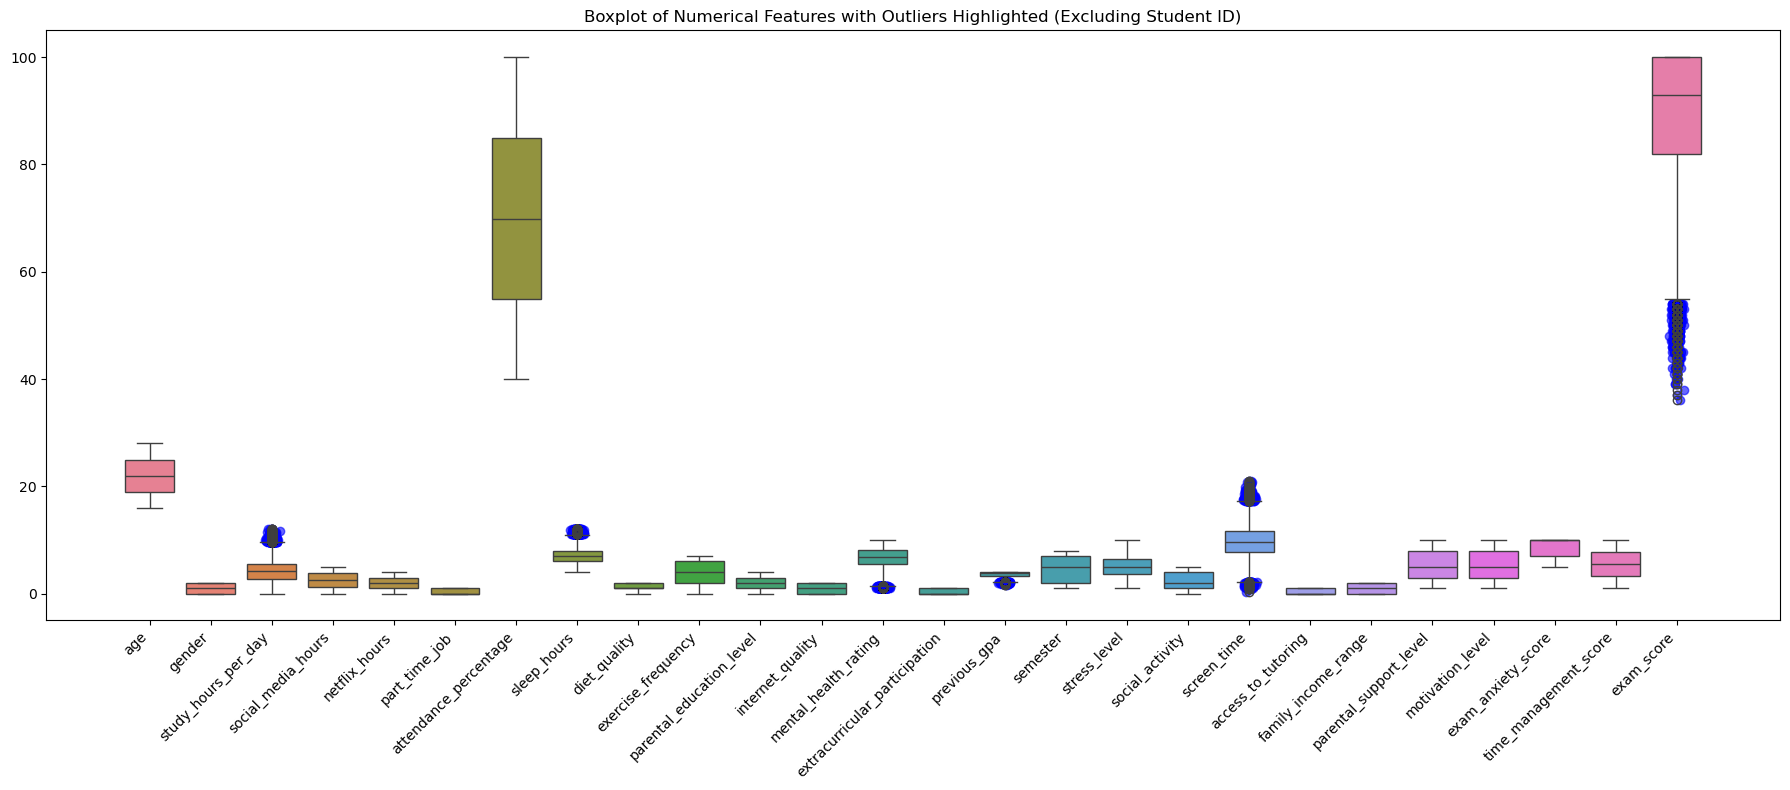

Number of outliers per numeric feature (excluding student_id):
age                                0
gender                             0
study_hours_per_day              346
social_media_hours                 0
netflix_hours                      0
part_time_job                      0
attendance_percentage              0
sleep_hours                      284
diet_quality                       0
exercise_frequency                 0
parental_education_level           0
internet_quality                   0
mental_health_rating             345
extracurricular_participation      0
previous_gpa                     201
semester                           0
stress_level                       0
social_activity                    0
screen_time                      356
access_to_tutoring                 0
family_income_range                0
parental_support_level             0
motivation_level                   0
exam_anxiety_score                 0
time_management_score              0
exam_score  

In [15]:
# Exclude student_id (irrelevant) and dropout_risk (bool)
numeric_df = df_students_numeric.select_dtypes(include=['int64', 'float64']).drop(columns=['student_id', 'dropout_risk'])

# Calculate IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Visualise the outliers
plt.figure(figsize=(18, 8))
sns.boxplot(data=numeric_df, showfliers=True)

# Overlay outliers manually as blue points
for i, col in enumerate(numeric_df.columns):
    y_outliers = numeric_df[col][outlier_mask[col]]
    x_outliers = np.random.normal(i, 0.04, size=len(y_outliers))  # jitter for visibility
    plt.scatter(x_outliers, y_outliers, color='blue', alpha=0.6)

plt.xticks(ticks=range(len(numeric_df.columns)), labels=numeric_df.columns, rotation=45, ha='right')
plt.title("Boxplot of Numerical Features with Outliers Highlighted (Excluding Student ID)")
plt.tight_layout()
plt.show()

# Show number of outliers
outliers = outlier_mask.sum()
print("Number of outliers per numeric feature (excluding student_id):")
print(outliers)

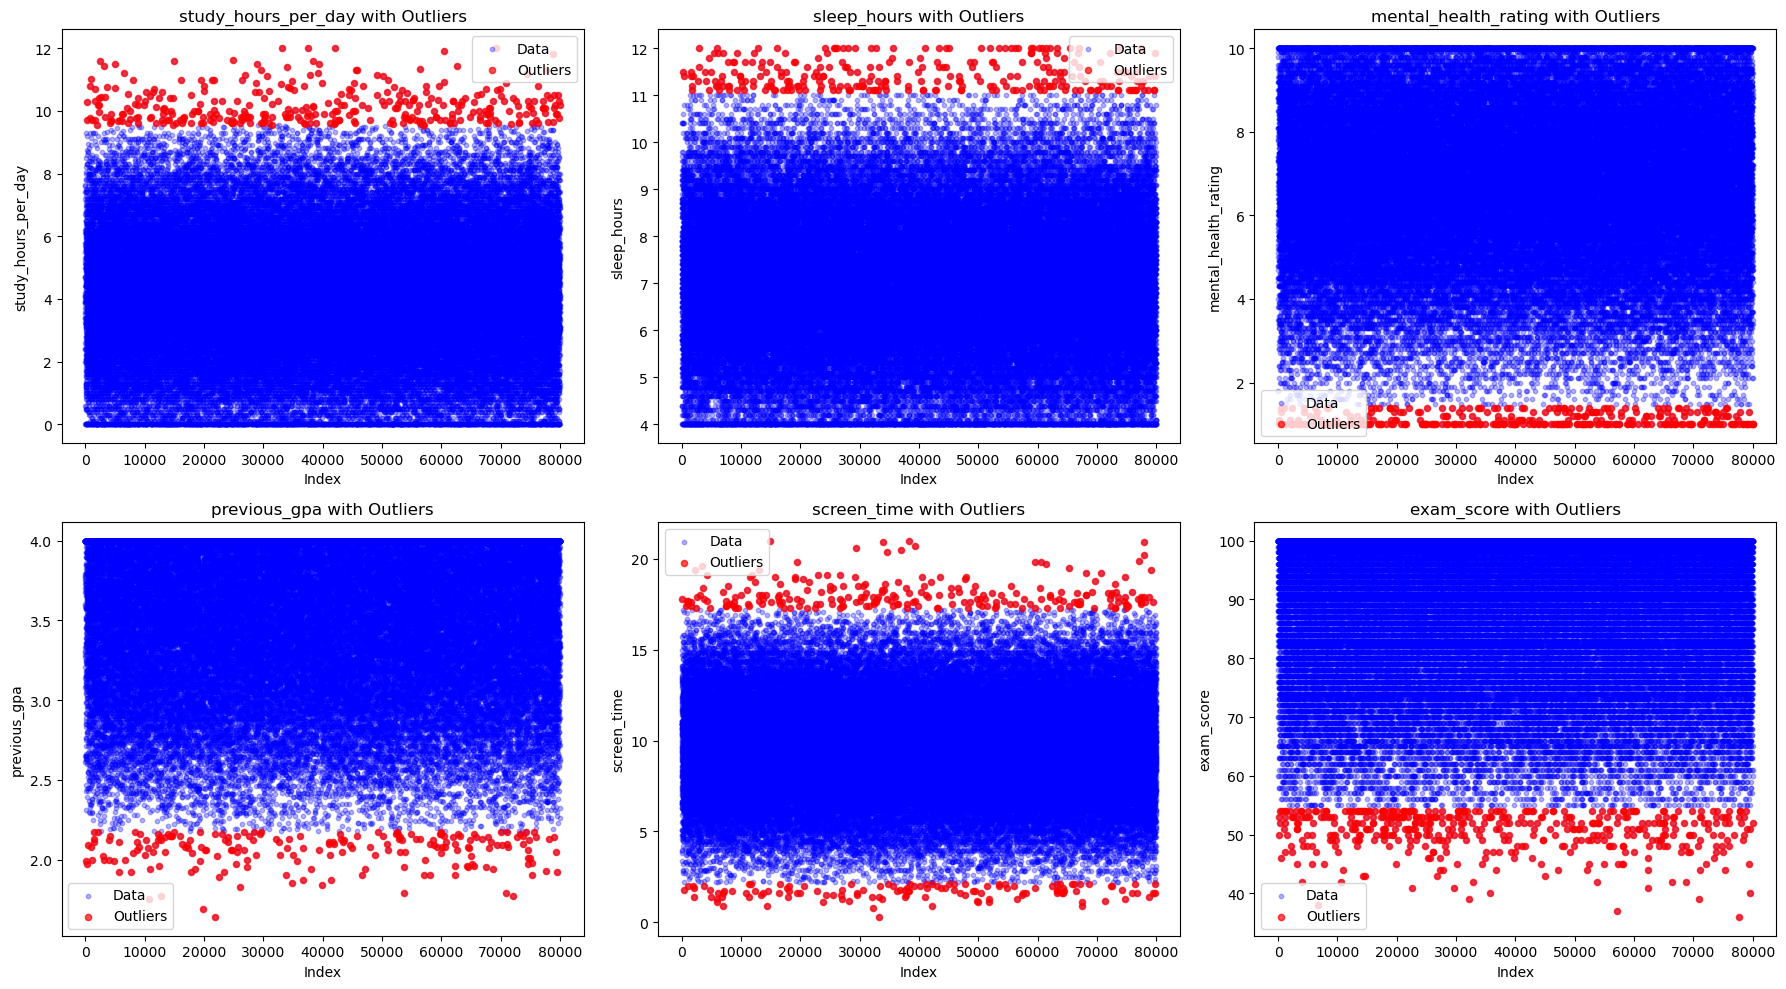

In [17]:
# Filter columns that have outliers
cols_with_outliers = outlier_mask.columns[outlier_mask.any()].tolist()

# Determine grid size
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cols_with_outliers):
    x_vals = np.arange(len(numeric_df[col]))
    
    # Plot all points in blue (smaller size, lighter alpha)
    axes[i].scatter(x_vals, numeric_df[col], color='blue', alpha=0.3, s=10, label='Data')
    
    # Overlay outliers in red
    axes[i].scatter(x_vals[outlier_mask[col]], numeric_df[col][outlier_mask[col]],
                    color='red', alpha=0.7, s=20, label='Outliers')
    
    axes[i].set_title(f'{col} with Outliers')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

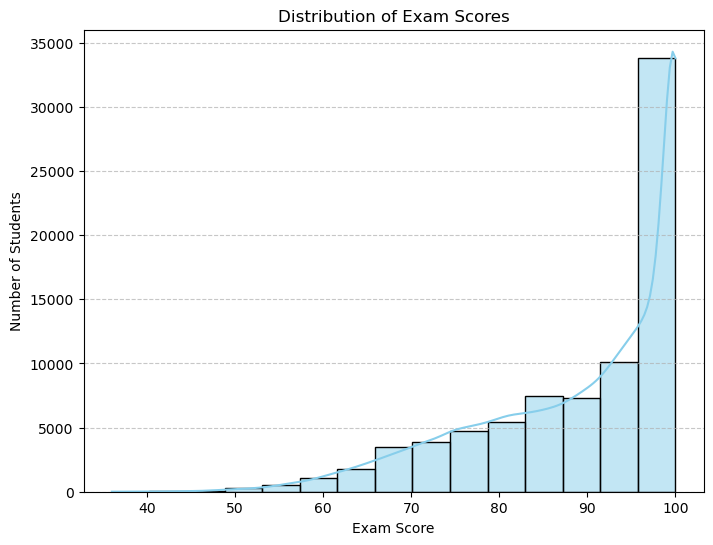

In [19]:
# Plot histogram of exam scores
plt.figure(figsize=(8,6))
sns.histplot(numeric_df['exam_score'], bins=15, kde=True, color='skyblue')
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.title('Distribution of Exam Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

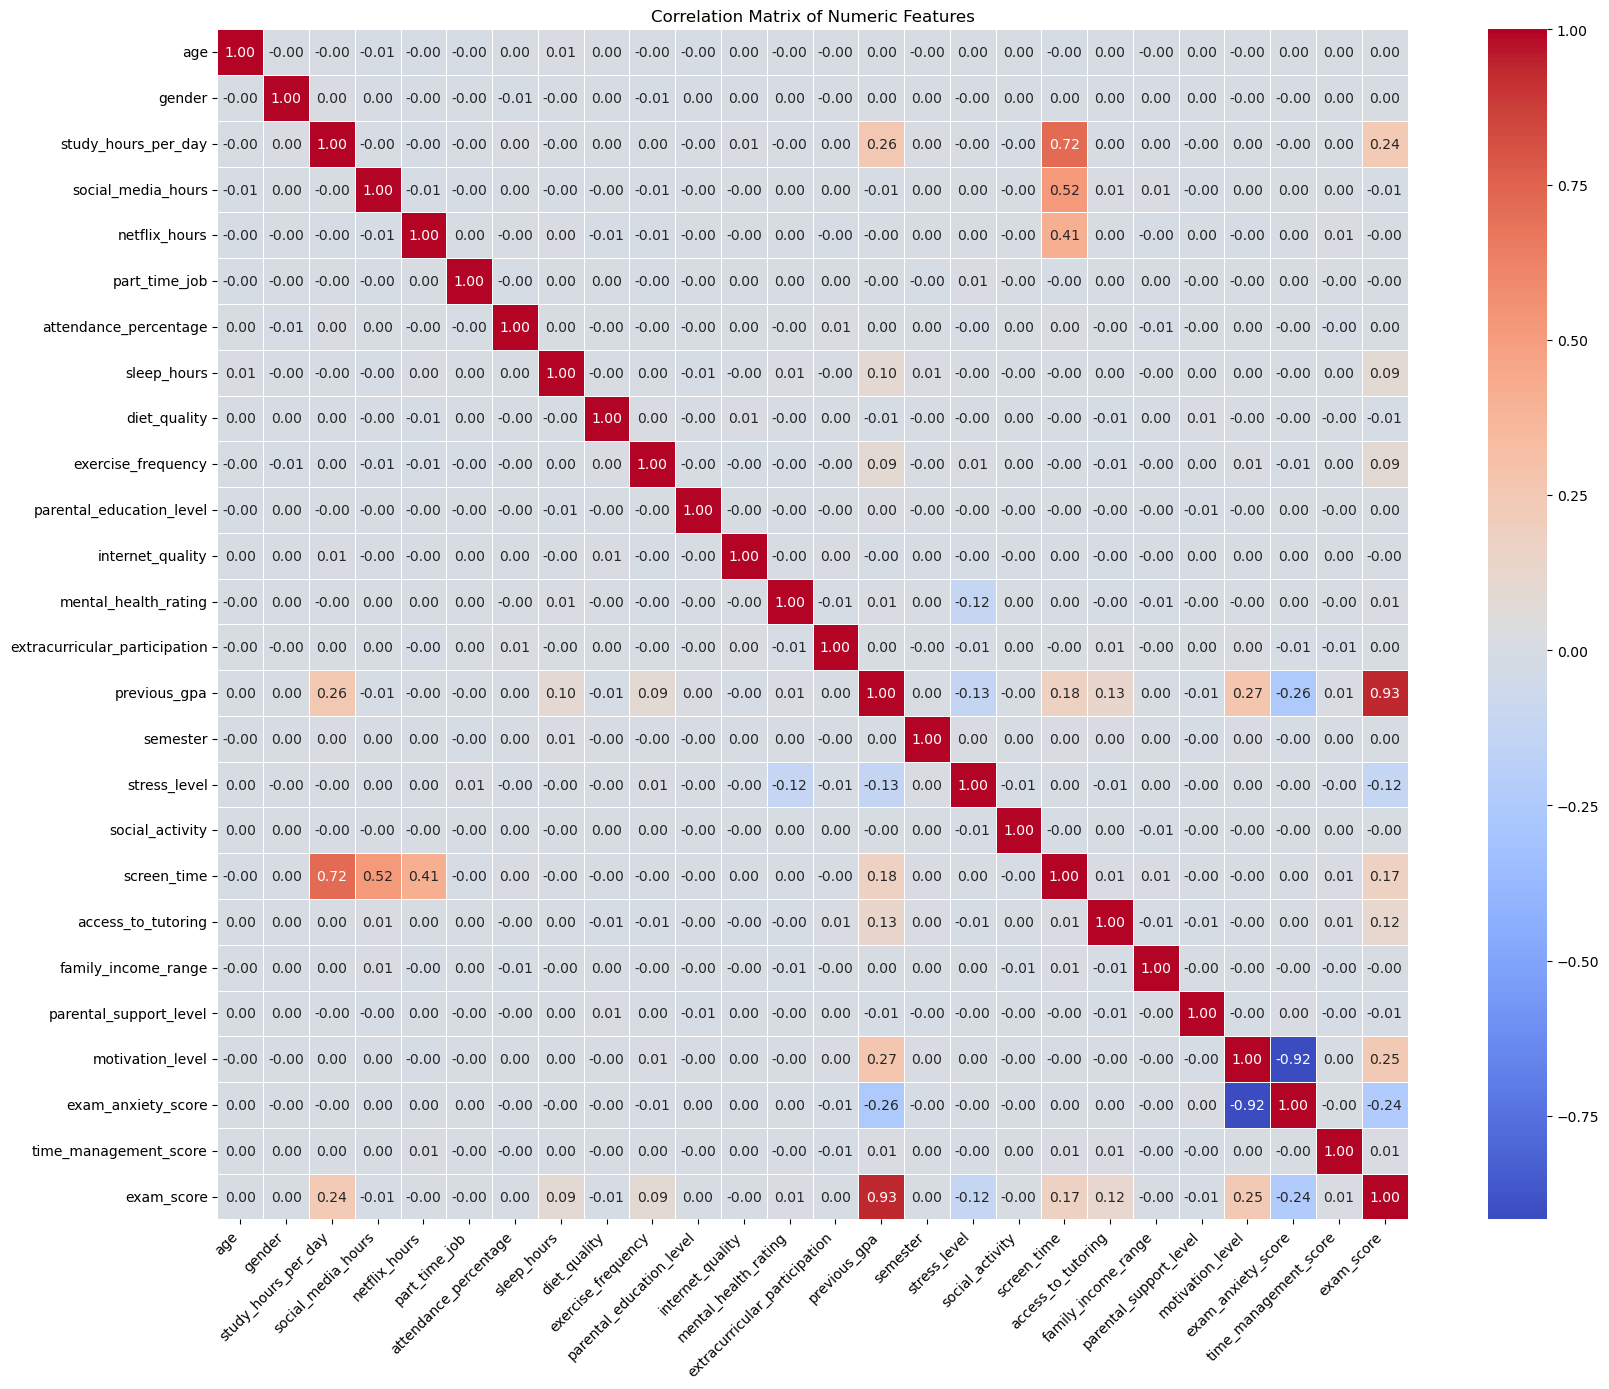

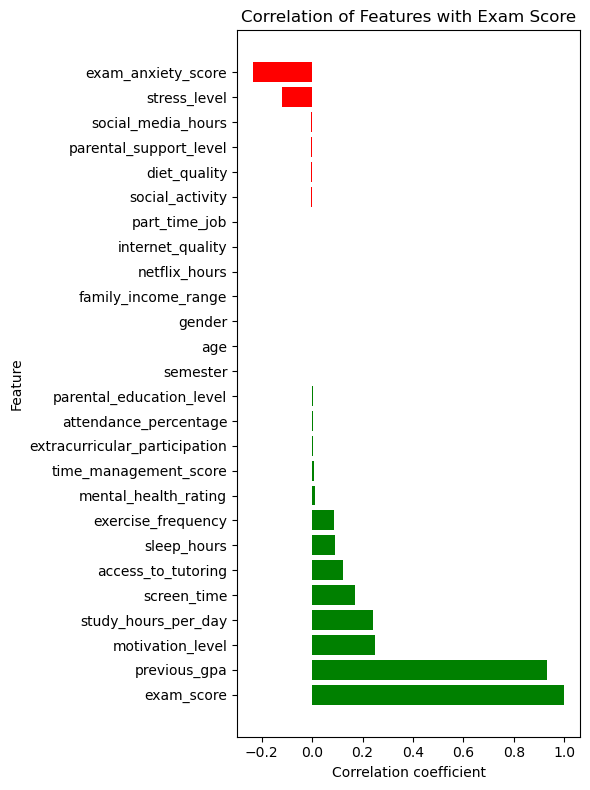

In [35]:
# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=0.5,
    square=True
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# Correlation values for exam score only
target = 'exam_score'
target_corr = corr_matrix[target].sort_values(ascending=False)

plt.figure(figsize=(6, 8))
for i, val in enumerate(target_corr.values):
    plt.barh(target_corr.index[i], val,
             color='green' if val > 0 else 'red')

plt.title("Correlation of Features with Exam Score")
plt.xlabel("Correlation coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor

In [22]:
# Make a copy of the dataset to preserve the original
df_model = df_students_numeric.copy()  # Copy original dataset

# Drop columns not used for modeling
df_model = df_model.drop(['study_environment', 'learning_style', 'major'], axis=1)  # Drop non-numeric or irrelevant
df_model.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,dropout_risk,social_activity,screen_time,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
0,100000,26,0,7.645367,3.0,0.1,1,70.3,6.2,0,...,0,0,10.9,1,2,9,7,8,3.0,100
1,100001,28,0,5.700000,0.5,0.4,0,88.4,7.2,2,...,0,5,8.3,1,0,7,2,10,6.0,99
2,100002,17,0,2.400000,4.2,0.7,0,82.1,9.2,2,...,0,5,8.0,1,2,3,9,6,7.6,98
3,100003,27,2,3.400000,4.6,2.3,1,79.3,4.2,1,...,0,3,11.7,1,0,5,3,10,3.2,100
4,100004,25,1,4.700000,0.8,2.7,1,62.9,6.5,2,...,0,2,9.4,1,1,9,1,10,7.1,98


Random Forest Regression Metrics for exam_score:
MSE: 17.98396668378018
RMSE: 4.240750721721354
MAE: 3.292605139233758
R2 Score: 0.8667775042723683


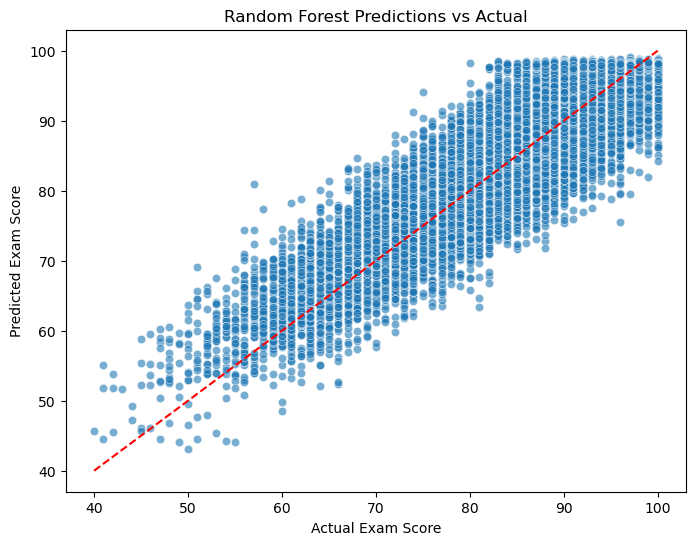

In [27]:
# Random Forest
# Separate features and target
df_rf = df_model.copy()
X = df_model.drop('exam_score', axis=1)  # Features
y = df_model['exam_score']               # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70-30 split

# Scale numeric features to 0-1 range
scaler = MinMaxScaler()                   # Initialize scaler
X_train = scaler.fit_transform(X_train)   # Fit on training data
X_test = scaler.transform(X_test)         # Transform test data

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, max_depth=20, random_state=42, n_jobs=-1) # Tuned hyperparameters

# Fit the model
rf_model.fit(X_train, y_train)            # Train model

# Predict on test data
y_pred = rf_model.predict(X_test)         # Predictions

# Evaluate model
print("Random Forest Regression Metrics for exam_score:")
print("MSE:", metrics.mean_squared_error(y_test, y_pred))   # Mean Squared Error
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  # Root MSE
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))  # Mean Absolute Error
print("R2 Score:", metrics.r2_score(y_test, y_pred))        # R2 Score

# Plot predicted vs actual exam_score
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # diagonal line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Random Forest Predictions vs Actual")
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Random Forest Regression Metrics after RandomizedSearchCV:
MSE: 17.324834198818003
RMSE: 4.162311160739668
MAE: 3.2244040584813107
R2 Score: 0.8716602576829946


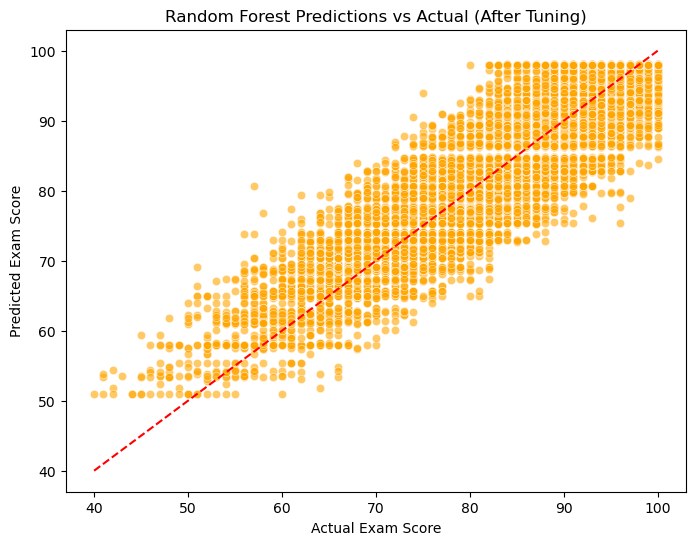

Best parameters found: {'n_estimators': 450, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 5}


In [29]:
# Random Forest Model Tuning
# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': [None] + list(np.arange(5, 31, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize a new Random Forest for tuning
rf_for_tuning = RandomForestRegressor(random_state=42)

# Setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_for_tuning,
    param_distributions=rf_param_grid,
    n_iter=50,       # number of random combinations
    cv=5,            # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,
    scoring='r2',    # maximize R²
    random_state=42
)

# Fit RandomizedSearchCV on the same training data
rf_random_search.fit(X_train, y_train)

# Predict on test data with tuned model
y_pred_tuned = rf_random_search.predict(X_test)

# Evaluate tuned model
print("\nRandom Forest Regression Metrics after RandomizedSearchCV:")
print("MSE:", mean_squared_error(y_test, y_pred_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tuned)))
print("MAE:", mean_absolute_error(y_test, y_pred_tuned))
print("R2 Score:", r2_score(y_test, y_pred_tuned))

# Plot predicted vs actual for tuned model
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # diagonal line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Random Forest Predictions vs Actual (After Tuning)")
plt.show()

# Display best hyperparameters
print("Best parameters found:", rf_random_search.best_params_)

Epoch 1/25
700/700 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 892.8034 - mae: 18.1837 - val_loss: 75.5443 - val_mae: 6.9783
Epoch 2/25
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 40.3029 - mae: 4.9504 - val_loss: 22.8451 - val_mae: 3.7743
Epoch 3/25
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 20.5701 - mae: 3.4978 - val_loss: 18.8741 - val_mae: 3.2730
Epoch 4/25
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19.0397 - mae: 3.3342 - val_loss: 17.9599 - val_mae: 3.1789
Epoch 5/25
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18.3599 - mae: 3.2679 - val_loss: 17.5337 - val_mae: 3.1367
Epoch 6/25
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18.0769 - mae: 3.2469 - val_loss: 18.1961 - val_mae: 3.3571
Epoch 7/25
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18.0041 - mae: 3.2465 - val_loss: 17.2584 - val_mae: 3.1291
Epoch 8/25
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17.9270 - mae: 3.2460 - val_loss: 17.2597 - val_mae: 3.1008
Epoch 9/25
700/700 ━━━━━━━━━━━━━━━━━━━

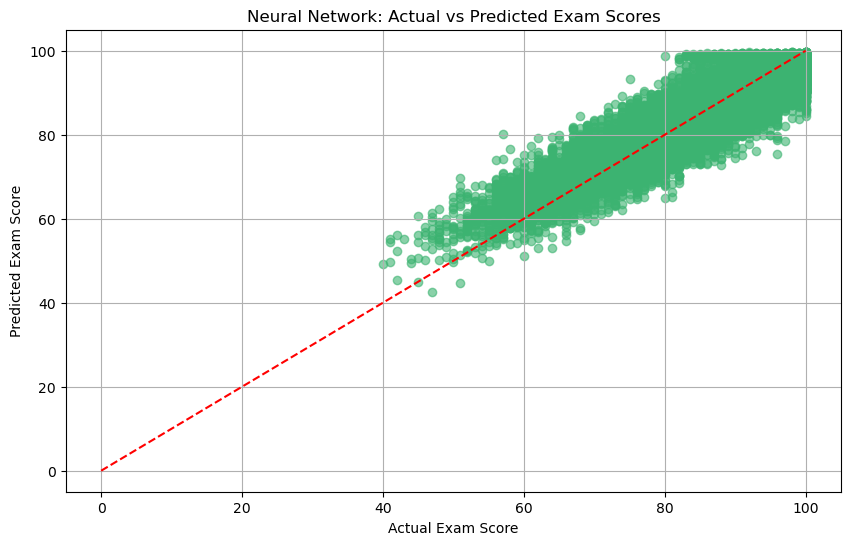

In [29]:
# Feed-forward Neural Network
# Separate features and target
df_nn = df_model.copy() 
X = df_nn.drop('exam_score', axis=1)  # Features
y = df_nn['exam_score']               # Target

# Split dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features to range [0,1] for neural network
scaler = MinMaxScaler()               
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        

# Build a simple feed-forward neural network model
nn_model = Sequential()
nn_model.add(Input(shape=(X_train_scaled.shape[1],)))  # Input layer
nn_model.add(Dense(64, activation='relu'))             # First hidden layer
nn_model.add(Dense(32, activation='relu'))             # Second hidden layer
nn_model.add(Dense(1, activation='linear'))            # Output layer

# Compile the model with optimizer and loss function
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])                

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  

# Train the model on training data
history = nn_model.fit(X_train_scaled, y_train, 
                       validation_split=0.2, 
                       epochs=25, 
                       batch_size=64, 
                       callbacks=[early_stop],
                       verbose=1)

# Predict exam scores on the test set
y_pred = nn_model.predict(X_test_scaled).flatten()  

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)                        
mae = mean_absolute_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)            

# Display performance metrics
print(f"Neural Network Performance Metrics:")
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.3f}")

# Plot actual vs predicted exam scores
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='mediumseagreen', alpha=0.6)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Neural Network: Actual vs Predicted Exam Scores')
plt.grid(True)
plt.show()

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=32, epochs=50, model__activation=relu, model__hidden_layers=1, model__neurons=64, model__optimizer=adam; total time= 2.3min
[CV] END batch_size=32, epochs=50, model__activation=relu, model__hidden_layers=1, model__neurons=64, model__optimizer=adam; total time= 2.3min
[CV] END batch_size=32, epochs=50, model__activation=relu, model__hidden_layers=1, model__neurons=64, model__optimizer=adam; total time= 2.3min
[CV] END batch_size=32, epochs=80, model__activation=relu, model__hidden_layers=1, model__neurons=64, model__optimizer=adam; total time= 3.6min
[CV] END batch_size=32, epochs=80, model__activation=relu, model__hidden_layers=1, model__neurons=64, model__optimizer=adam; total time= 3.6min
[CV] END batch_size=32, epochs=80, model__activation=relu, model__hidden_layers=1, model__neurons=64, model__optimizer=adam; total time= 3.7min
[CV] END batch_size=32, epochs=50, model__activation=relu, model__hidden_lay

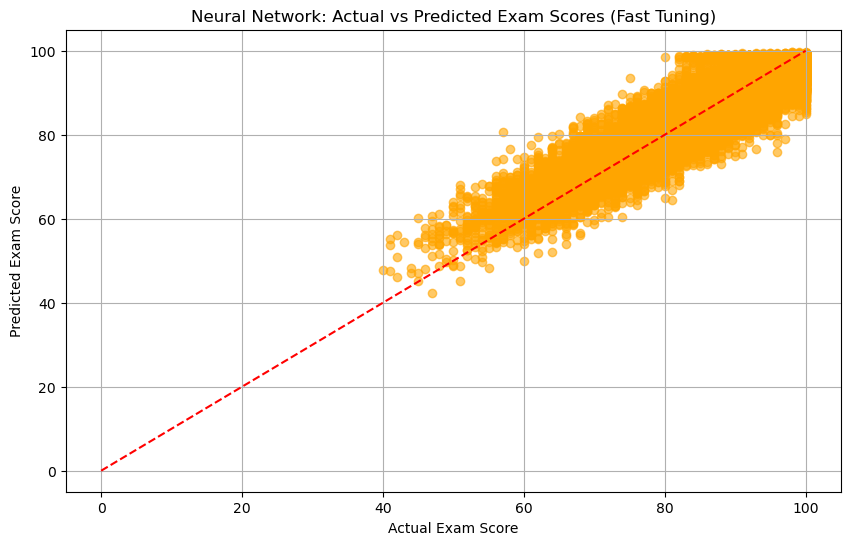

In [37]:
# FNN Model Tuning (Optimised for Speed)

# Function to create Keras model with tunable hyperparameters
def create_nn_model(hidden_layers=1, neurons=32, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))
    for _ in range(hidden_layers):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Wrap Keras model for scikeras
nn = KerasRegressor(model=create_nn_model, verbose=0)

# Reduced hyperparameter grid for faster tuning
nn_param_grid = {
    'model__hidden_layers': [1, 2],
    'model__neurons': [32, 64],
    'model__activation': ['relu'],
    'model__optimizer': ['adam'],
    'batch_size': [32],
    'epochs': [50, 80]  # reduced range
}

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# RandomizedSearchCV with fewer iterations
nn_random_search = RandomizedSearchCV(
    estimator=nn,
    param_distributions=nn_param_grid,
    n_iter=4,           # try only 4 random combinations
    cv=3,               # 3-fold cross-validation
    verbose=2,
    n_jobs=1,           # keep at 1 for TensorFlow stability
    scoring='r2',
    random_state=42
)

# Fit RandomizedSearchCV on training data
nn_random_search.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Predict on test set
y_pred_tuned = nn_random_search.predict(X_test_scaled)

# Evaluate tuned model
mse = mean_squared_error(y_test, y_pred_tuned)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_tuned)
r2 = r2_score(y_test, y_pred_tuned)

print("\nNeural Network Metrics after Fast RandomizedSearchCV:")
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.3f}")
print("Best parameters found:", nn_random_search.best_params_)

# Plot predicted vs actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_tuned, color='orange', alpha=0.6)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Neural Network: Actual vs Predicted Exam Scores (Fast Tuning)')
plt.grid(True)
plt.show()

Random Forest Regression Metrics for exam_score:
MSE: 17.816947568301202
RMSE: 4.221012623565724
MAE: 3.3660791142152586
R2 Score: 0.8669870836419972


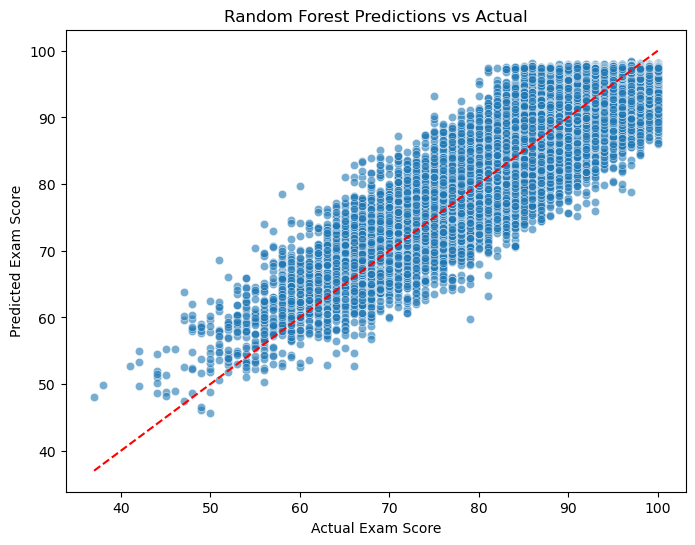

In [31]:
# Test to handle exam score imbalance (worse result)
# Prepare dataset
df_model = df_students_numeric.copy()  # Preserve original
df_model = df_model.drop(['study_environment', 'learning_style', 'major'], axis=1)

# Bin target
df_model['score_bin'] = pd.qcut(df_model['exam_score'], q=10, duplicates='drop')

# Count frequency per bin
bin_counts = df_model['score_bin'].value_counts()

# Compute inverse-frequency weights as float
weights = df_model['score_bin'].map(lambda b: 1 / bin_counts[b]).astype(float)

# Normalize weights
weights /= weights.mean()


# Separate features and target
X = df_model.drop(['exam_score', 'score_bin'], axis=1)
y = df_model['exam_score']

# Split train/test sets with stratification
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, weights, test_size=0.3, random_state=42, stratify=df_model['score_bin']
)

# Scale numeric features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest with sample weights
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train, sample_weight=w_train)

# Predict and evaluate# Step 7: Predict and evaluate
y_pred = rf_model.predict(X_test)

print("Random Forest Regression Metrics for exam_score:")
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score:", metrics.r2_score(y_test, y_pred))

# Plot predicted vs actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Random Forest Predictions vs Actual")
plt.show()

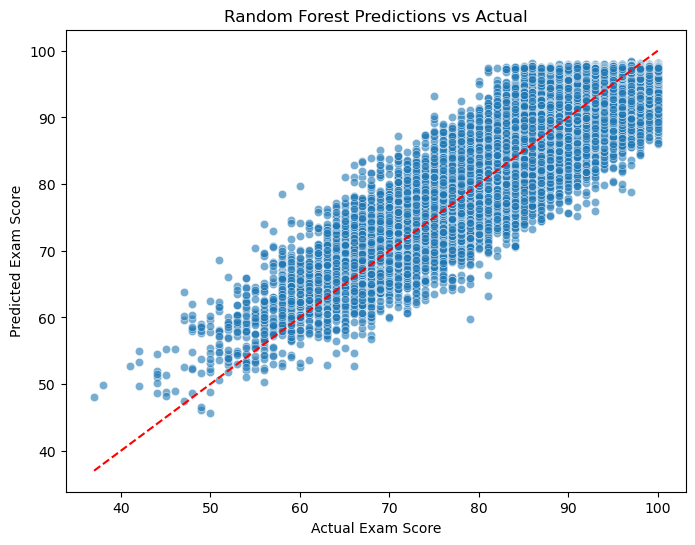